### 10.9 
最先由 Box 和 Jenkins(1976) 研究的月航线客运量时间序列被视为典型的时间序列。数据详见文件 airline.

In [14]:
library(TSA)
data(AirPassengers)

#### (a) 
画出此序列的原始形式和取对数形式的时间序列图。说明对数变换在这里是恰当的。  

$\text{Solution.}$

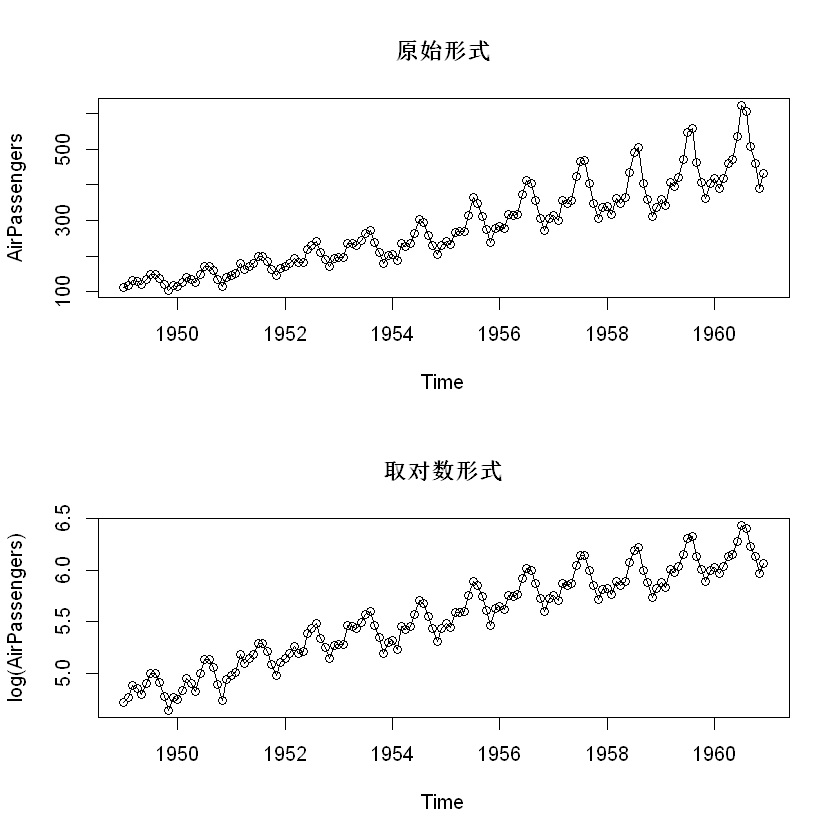

In [2]:
par(mfrow = c(2,1))
plot(AirPassengers, type='o', main='原始形式')
plot(log(AirPassengers), type='o', main='取对数形式')

从图中可以看出，两个时间序列都表现出了明显的上升趋势。  

但是，取对数后序列的上升趋势明显要更加的稳定。  

因此如果我们想对其进行分析，取对数后的序列是更合适的。

#### (b) 
画出并解释取对数后序列的一次差分时间序列图。  

$\text{Solution.}$

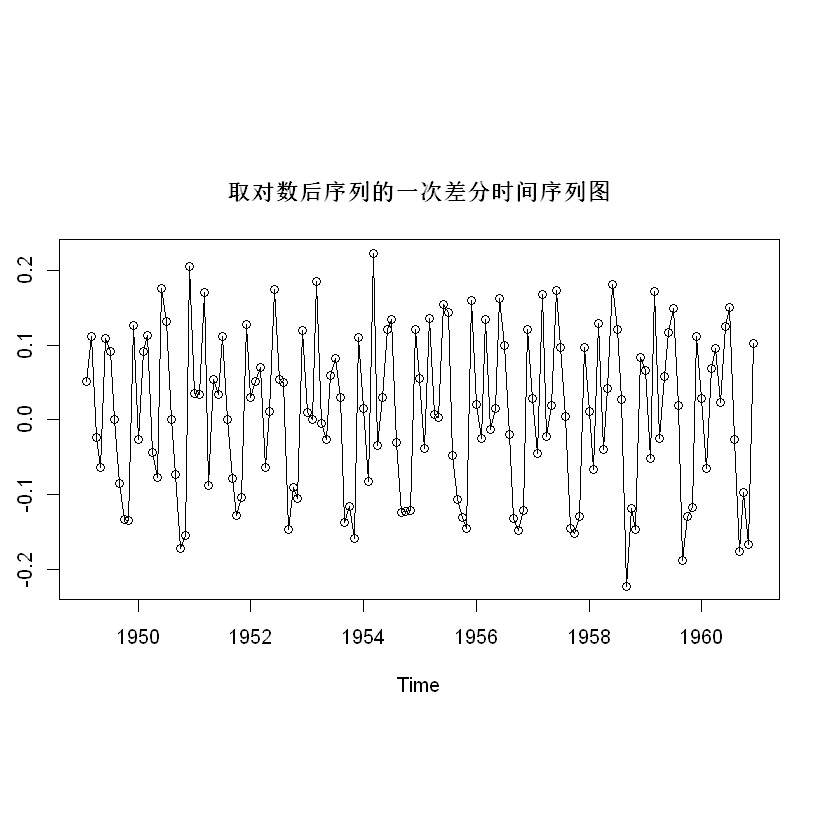

In [3]:
par(pin=c(6,3))

plot(diff(log(AirPassengers)), 
     pch=1, type='o', 
     main='取对数后序列的一次差分时间序列图')

基本上识别不出明显的趋势。

但是，有理由怀疑，这个差分序列存在着某种季节性波动。

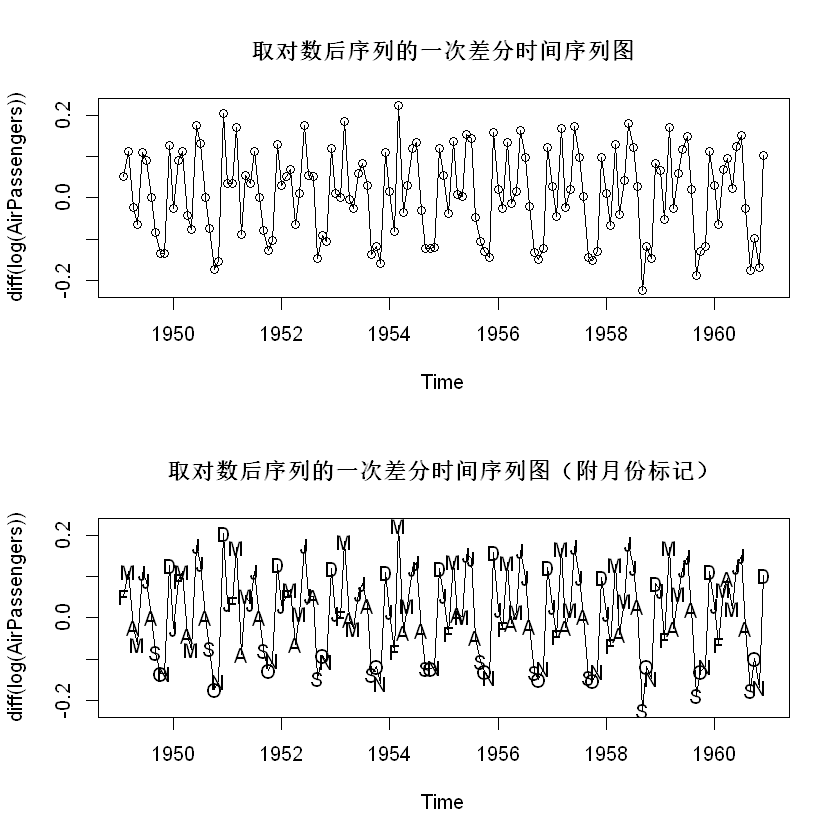

In [4]:
par(mfrow = c(2,1))

plot(diff(log(AirPassengers)), 
     pch=1, type='o', 
     main='取对数后序列的一次差分时间序列图')

plot(diff(log(AirPassengers)), 
     type='l', 
     main='取对数后序列的一次差分时间序列图（附月份标记）') 
points(diff(log(AirPassengers)), 
       x= time(diff(AirPassengers)), 
       pch= as.vector(season(diff(log(AirPassengers)))))

季节性是较为明晰的。  

例如，标记为‘M’、‘J’、‘D’的月份总比其他月份要高。标记为‘O’、‘S’的月份总是较低。

#### (c) 
画出并解释取对数后序列经一次差分和季节差分后的时间序列图。  

$\text{Solution.}$

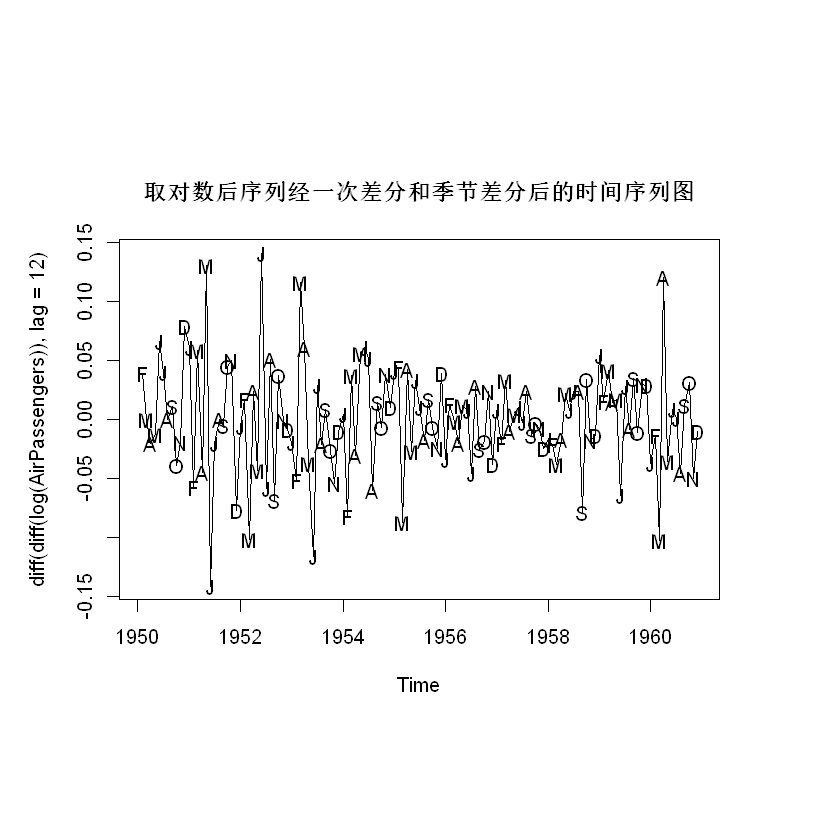

In [5]:
par(pin=c(5,3))

plot(diff(diff(log(AirPassengers)), lag=12), type='l', 
     main= '取对数后序列经一次差分和季节差分后的时间序列图')  

points(diff(diff(log(AirPassengers)), lag=12), 
       x=time(diff(diff(log(AirPassengers)), lag=12)), 
       pch= as.vector(season(diff(log(AirPassengers)))))

季节周期性变得不那么明显了。  

未经季节差分的序列中，标记为‘M’、‘J’、‘D’的月份总比其他月份要高。标记为‘O’、‘S’的月份总是较低。但是，经过季节差分后，这些月份的波动变得不那么明显了。

#### (d) 
计算并解释取对数后序列经一次差分和季节差分后的样本 ACF。  

$\text{Solution.}$

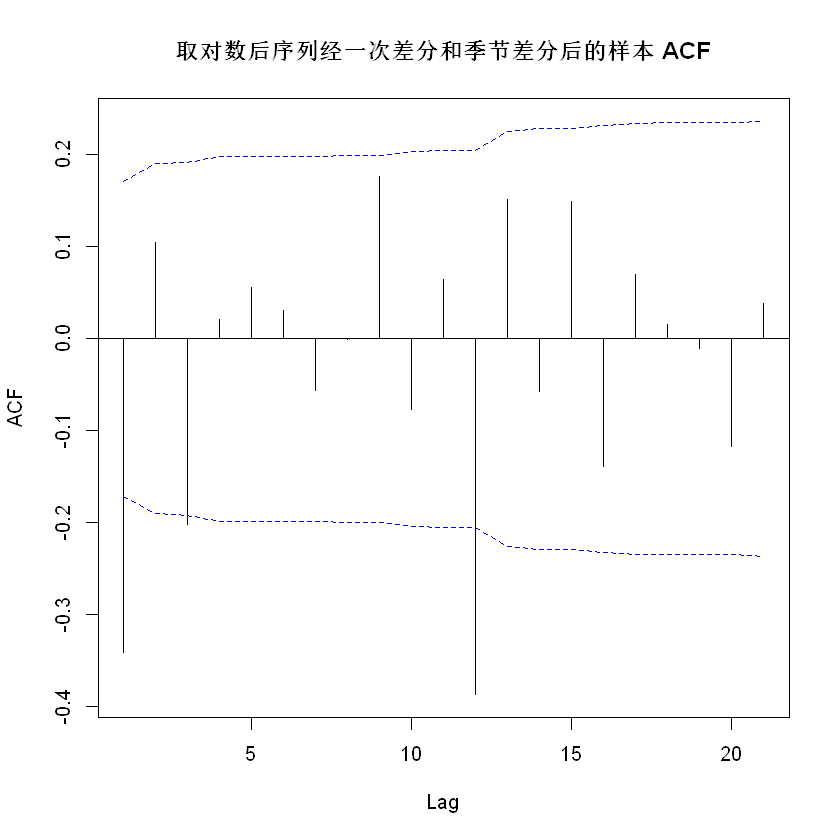

In [6]:
acf(as.vector(diff( diff(log(AirPassengers)), lag=12 ) ), 
    ci.type='ma', 
    main='取对数后序列经一次差分和季节差分后的样本 ACF')

由上图可知，在1月和12月，都存在显著自相关。  

另外在3月似乎也由显著的自相关（相对不那么显眼）。  

#### (e) 
用“航线模型”（ $\text{ARIMA}(0, 1, 1)×(0, 1, 1)_{12}$ ）拟合对数化的序列。  

$\text{Solution.}$

In [7]:
model = arima(log(AirPassengers), 
              order=c(0,1,1), 
              seasonal=list(order=c(0,1,1), 
              period=12))

model


Call:
arima(x = log(AirPassengers), order = c(0, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -485.4

系数拟合结果都显著。  

$\hat{\theta} = 0.4018$ , $\hat{\Theta}= 0.5569$

#### (f) 
对模型及其自相关性和残差的正态性进行诊断。  

$\text{Solution.}$

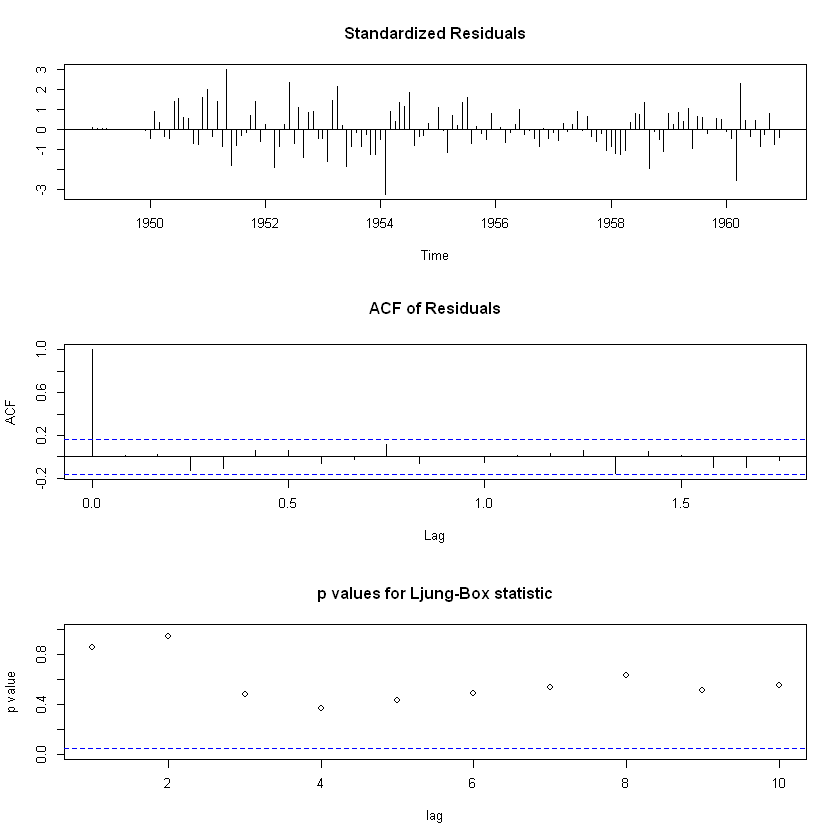

In [8]:
tsdiag(model)

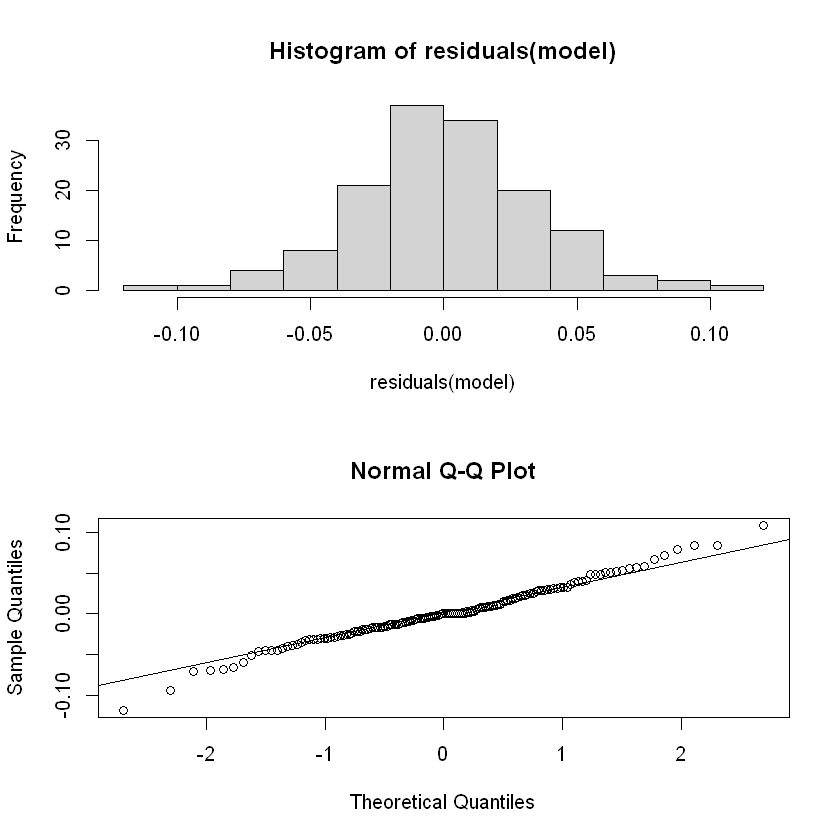

In [9]:
par(mfrow = c(2,1))
hist(residuals(model))

qqnorm(model$residuals)
qqline(model$residuals)

In [10]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98637, p-value = 0.1674


自相关性和残差的正态性表现都相对良好。  

#### (g) 
假设前置时间为两年，对此序列进行预测，并要求给出预测极限。  

$\text{Solution.}$

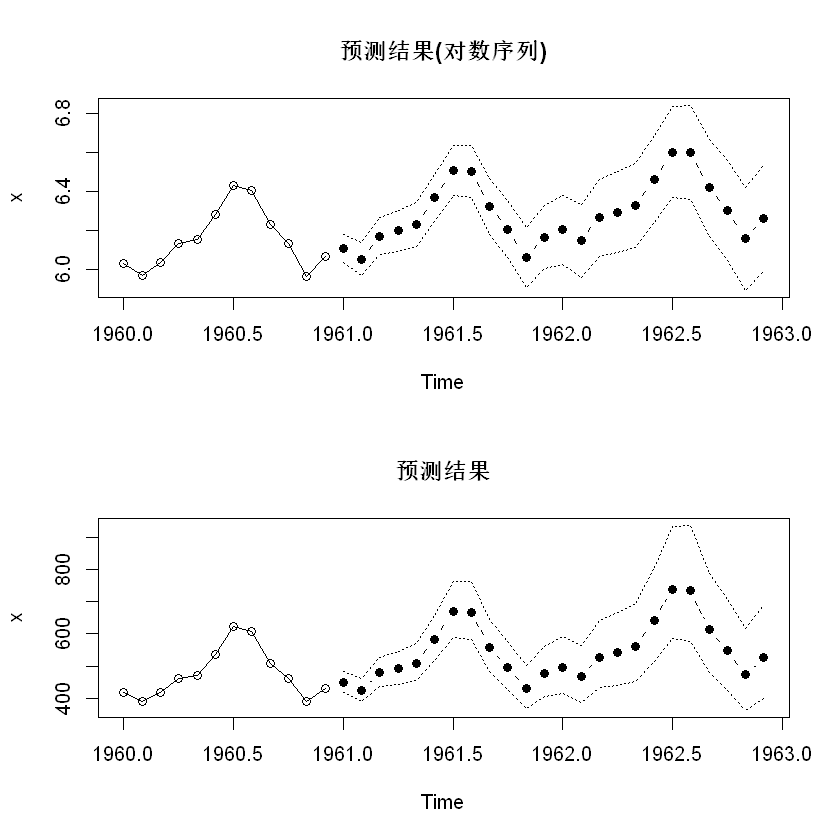

In [11]:
par(mfrow=c(2,1))
plot(model,n1=c(1960,1), n.ahead=24, pch=19, main='预测结果(对数序列)')  
plot(model,n1=c(1960,1), n.ahead=24, pch=19, main='预测结果', transform=exp)

黑色点为预测值，虚线为预测极限。